**Lab | Unsupervised learning intro (GNOD - part 4)**

Instructions
It's the moment to perform clustering on the songs you collected. Remember that the ultimate goal of this little project is to improve the recommendations of songs in the hope that the user will enjoy the new song. Clustering the songs will allow the recommendation system to limit the scope of the recommendations to only songs that belong to the same cluster - songs with similar audio features.

The activities you did with the Spotify API and the PopVortex web scraping will allow you to create a pipeline such that when the user enters a song, you:

1. Check whether or not the input song is in the PopVortex Hot 100.
2. Recommend another Hot 100 song
3. If it is NOT in the hot 100, then collect the audio features from the Spotify API for the input song.
4. You want to send the Spotify audio features of the submitted song to the clustering model, which should return a cluster number.
5. Then you recommend a song from the same cluster number.

Your model will be even more accurate the more songs you use to create your clusters in your model, so you want to have as many songs as possible to create the clustering model. You can find some larger datasets on Kaggle containing more songs with audio features that have already been scraped and saved as a .csv file. You can add these to your own scraped data.

In [2]:
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

In [3]:
pl = pd.read_csv('Big_playlist.csv')
pl.head()

,Title,Artist,ID,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,You're The One - Un mal pour un bien,Petula Clark,7dmLg6dYLmjlJXNwFEPQqf,0.451,0.670,5,-8.938,0,0.0366,0.651,0.000000,0.6430,0.871,136.860,145960
1,Doctor My Eyes,Jackson Browne,3QcuZo6WLcFkqqLmDs0d95,0.480,0.626,5,-8.406,1,0.0294,0.266,0.000057,0.0857,0.542,75.630,199907
2,Falling in Love at a Coffee Shop,Landon Pigg,1KHdq8NK9QxnGjdXb55NiG,0.489,0.561,4,-7.933,1,0.0274,0.200,0.000046,0.1790,0.238,83.457,244987
3,Peaceful Easy Feeling - 2013 Remaster,Eagles,40h65HAR8COEoqkMwUUQHu,0.568,0.634,4,-12.336,1,0.0282,0.494,0.002810,0.2520,0.866,142.686,257963
4,Summertime Blues,Eddie Cochran,3oAWTk92mZBxKBOKf8mR5v,0.714,0.886,11,-8.629,0,0.0554,0.116,0.184000,0.1800,0.954,156.351,119360


In [4]:
pl.drop(['ID'],axis=1,inplace=True)
pl.head()

,Title,Artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,You're The One - Un mal pour un bien,Petula Clark,0.451,0.670,5,-8.938,0,0.0366,0.651,0.000000,0.6430,0.871,136.860,145960
1,Doctor My Eyes,Jackson Browne,0.480,0.626,5,-8.406,1,0.0294,0.266,0.000057,0.0857,0.542,75.630,199907
2,Falling in Love at a Coffee Shop,Landon Pigg,0.489,0.561,4,-7.933,1,0.0274,0.200,0.000046,0.1790,0.238,83.457,244987
3,Peaceful Easy Feeling - 2013 Remaster,Eagles,0.568,0.634,4,-12.336,1,0.0282,0.494,0.002810,0.2520,0.866,142.686,257963
4,Summertime Blues,Eddie Cochran,0.714,0.886,11,-8.629,0,0.0554,0.116,0.184000,0.1800,0.954,156.351,119360


In [5]:
import numpy as np
X = pl.select_dtypes(include=np.number)

In [6]:
X.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.451,0.670,5,-8.938,0,0.0366,0.651,0.000000,0.6430,0.871,136.860,145960
1,0.480,0.626,5,-8.406,1,0.0294,0.266,0.000057,0.0857,0.542,75.630,199907
2,0.489,0.561,4,-7.933,1,0.0274,0.200,0.000046,0.1790,0.238,83.457,244987
3,0.568,0.634,4,-12.336,1,0.0282,0.494,0.002810,0.2520,0.866,142.686,257963
4,0.714,0.886,11,-8.629,0,0.0554,0.116,0.184000,0.1800,0.954,156.351,119360


In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
list(X.columns)

['danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms']

In [9]:
scaler = StandardScaler()
X_prep = scaler.fit_transform(X)

In [10]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=1234)
kmeans.fit(X_prep)

/Users/landy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=1234)

In [11]:
clusters = kmeans.predict(X_prep)

pd.Series(clusters).value_counts().sort_index()

0    3424
1    6470
2     825
dtype: int64

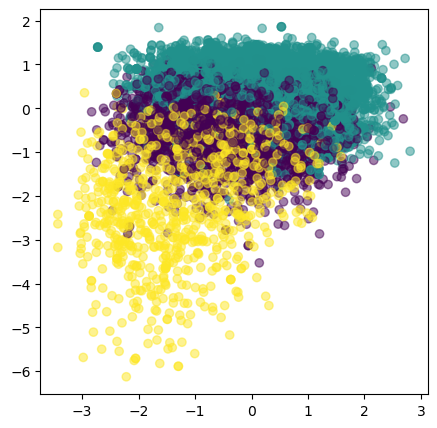

In [12]:
plt.figure(figsize=(5, 5))
plt.scatter(X_prep[:, 0], X_prep[:, 3], c=clusters,alpha=0.5)
plt.show()

In [13]:
clusters

array([1, 0, 0, ..., 2, 2, 2], dtype=int32)

In [14]:
kmeans.inertia_ 

96163.86338962792

/Users/landy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/landy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/landy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/landy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/landy/anacond

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

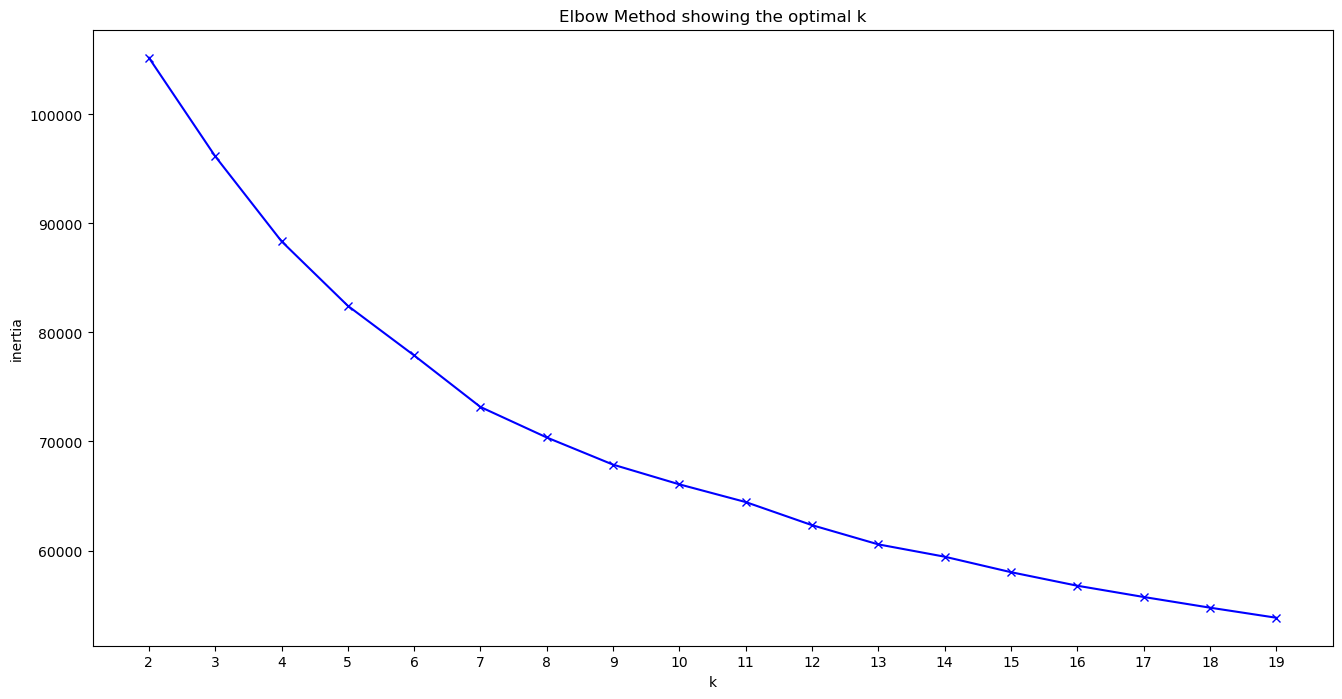

In [15]:
import numpy as np
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

/Users/landy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/landy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/landy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/landy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/landy/anacond

Text(0.5, 1.0, 'Slhouette score showing the optimal k')

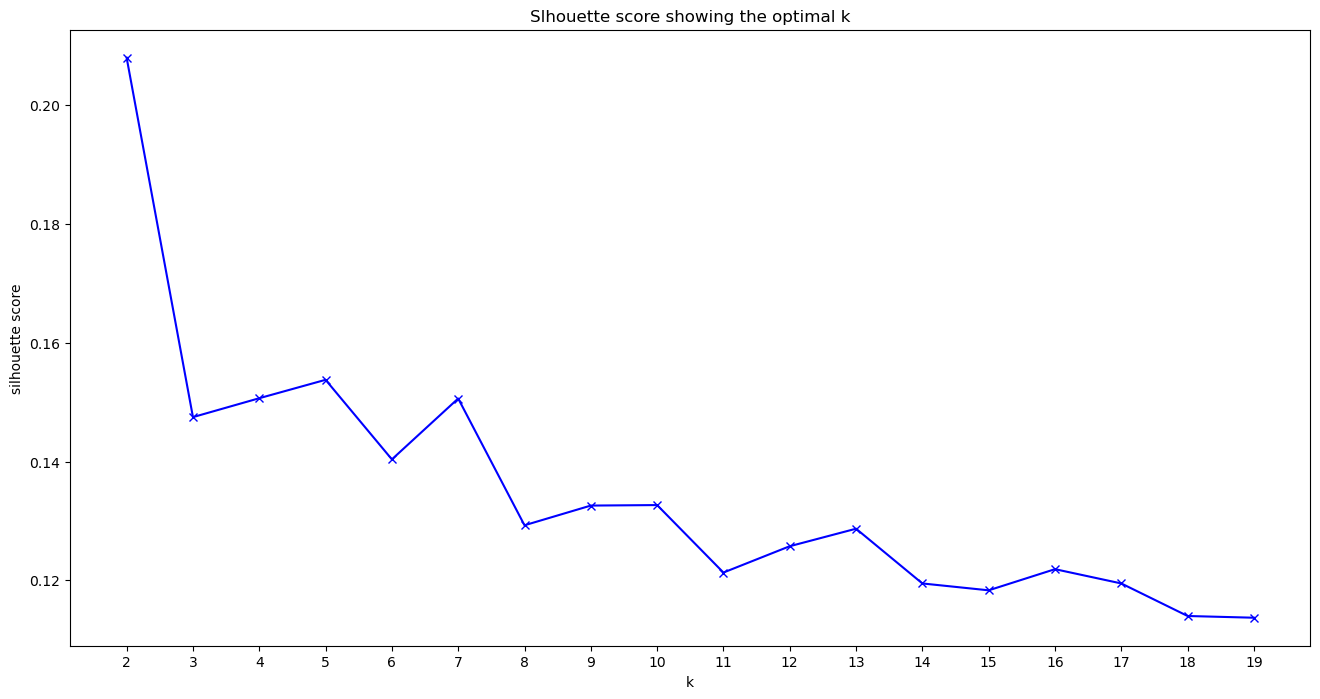

In [16]:
from sklearn.metrics import silhouette_score
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Slhouette score showing the optimal k')

In [17]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=1234)
kmeans.fit(X_prep)

clusters = kmeans.predict(X_prep)

pd.Series(clusters).value_counts().sort_index()

/Users/landy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0     259
1    1699
2     532
3     656
4    1885
5    1538
6    1654
7    1210
8     583
9     703
dtype: int64

In [18]:
clusters

array([2, 1, 4, ..., 9, 9, 9], dtype=int32)

In [19]:
cluster = pd.DataFrame(clusters)
cluster.head()

,0
0,2
1,1
2,4
3,1
4,5


In [20]:
pl = pl.iloc[:,:2]
pl.head()

,Title,Artist
0,You're The One - Un mal pour un bien,Petula Clark
1,Doctor My Eyes,Jackson Browne
2,Falling in Love at a Coffee Shop,Landon Pigg
3,Peaceful Easy Feeling - 2013 Remaster,Eagles
4,Summertime Blues,Eddie Cochran


In [21]:
pl_concat = pd.concat([pl, cluster],axis=1,ignore_index=True)
pl_concat.head()

,0,1,2
0,You're The One - Un mal pour un bien,Petula Clark,2
1,Doctor My Eyes,Jackson Browne,1
2,Falling in Love at a Coffee Shop,Landon Pigg,4
3,Peaceful Easy Feeling - 2013 Remaster,Eagles,1
4,Summertime Blues,Eddie Cochran,5


In [22]:
pl_concat.columns = ['song','artist','cluster']
pl_concat.head()

,song,artist,cluster
0,You're The One - Un mal pour un bien,Petula Clark,2
1,Doctor My Eyes,Jackson Browne,1
2,Falling in Love at a Coffee Shop,Landon Pigg,4
3,Peaceful Easy Feeling - 2013 Remaster,Eagles,1
4,Summertime Blues,Eddie Cochran,5


In [23]:
pl_concat.shape

(10719, 3)

In [24]:
pl_concat['cluster'].value_counts()

4    1885
1    1699
6    1654
5    1538
7    1210
9     703
3     656
8     583
2     532
0     259
Name: cluster, dtype: int64

In [25]:
pl_concat.to_csv('Playlist_clustered.csv', index=False)

**Check if song is in PopVortex Hot 100.**

In [26]:
from bs4 import BeautifulSoup
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [27]:
url = 'https://www.popvortex.com/music/charts/top-100-songs.php'
response = requests.get(url)
display(response.status_code)
soup = BeautifulSoup(response.content, "html.parser")
soup

200

<!DOCTYPE html>
<html lang="en"><head><meta charset="utf-8"/><title>iTunes Top 100 Songs Chart 2023</title><meta content="width=device-width, initial-scale=1" name="viewport"/><meta content="iTunes top 100 songs chart list. The most popular hit music and trending songs of 2023. Chart of today's current iTunes top 100 songs is updated daily." name="description"/><meta content="iTunes Top 100 Songs Chart 2023" property="og:title"><script async="" crossorigin="anonymous" src="https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js?client=ca-pub-8935069470799160"></script><meta content="Chart of the top 100 songs on iTunes. Chart list of the top 100 song downloads of 2023 is updated daily." property="og:description"><meta content="article" property="og:type"><meta content="https://www.popvortex.com/images/logo-facebook.png" property="og:image"/><meta content="PopVortex" property="og:site_name"/><meta content="https://www.popvortex.com/music/charts/top-100-songs.php" property="og:url

In [28]:
#initialize empty lists
title = []
artist = []
genre = []
date = []


# define the number of iterations of our for loop
# by checking how many elements are in the retrieved result set
# (this is equivalent but more robust than just explicitly defining 250 iterations)
num_iter = len(soup.select("div.chart-content.col-xs-12.col-sm-8 > p"))

tlist = soup.select("div.chart-content.col-xs-12.col-sm-8 > p > cite")
alist = soup.select("div.chart-content.col-xs-12.col-sm-8 > p > em")
# iterate through the result set and retrive all the data
for i in range(num_iter):
    title.append(tlist[i].get_text())
    artist.append(alist[i].get_text())

In [31]:
PopVortex = pd.DataFrame({'title': title, 'artist': artist})
PopVortex.head()


,title,artist
0,Fast Car,Luke Combs
1,Last Night,Morgan Wallen
2,Need A Favor,Jelly Roll
3,Take Two,BTS
4,Save Me (with Lainey Wilson),Jelly Roll


**Extract input song audio features.**

In [30]:
# connect to Spotify

secrets_file = open("SpotiPy credentials.txt","r")
string = secrets_file.read()
string.split('\n')
secrets_dict={}
for line in string.split('\n'):
    if len(line) > 0:
        secrets_dict[line.split(':')[0]]=line.split(':')[1].strip()
        
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

#Initialize SpotiPy with user credentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=secrets_dict['clientID'],
                                                           client_secret=secrets_dict['clientSecret']))

In [43]:
trackName = input('Enter a song you like: ')
# artistName = input('Enter the artist name: ')

Enter a song you like: Flowers
Enter the artist name: Miley Cyrus


In [57]:
q = 'track:'+trackName # +'%20artist:'+artistName.replace(' ','%20')

In [58]:
q

'track:Flowers'

In [68]:
targetURI = sp.search(q, type='track', limit=1)['tracks']['items'][0]['uri']
targetURI

'spotify:track:0yLdNVWF3Srea0uzk55zFn'

In [73]:
targetAudioFeatures = pd.DataFrame(sp.audio_features(targetURI))
targetAudioFeatures.drop(['type','id','uri','track_href','analysis_url','time_signature'],axis=1,inplace=True)
targetAudioFeatures

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.707,0.681,0,-4.325,1,0.0668,0.0632,0.000005,0.0322,0.646,117.999,200455


In [75]:
targetAudioFeatures_scaled = scaler.fit_transform(targetAudioFeatures)


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

**Recommender**

In [ ]:
# if song is in Hot 100, recommend another song from the list 

if song in songs.title.to_list():
    print('You might also like: ', random.choice(songs.title))

# if not in Hot 100,     
else:
    print('Try a different song.')